In [3]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def remove(Sequence,CharacterArrays):
    NewSequence = ''.join((filter(lambda i: i not in CharacterArrays, Sequence)))
    return NewSequence

In [5]:
TP53_sequence_path = r"C:\Users\Teja Nikhil\OneDrive\Desktop\ASSIGNMENTS AND PROJECTS\SEM-2\Semester-2 EndSem Projects\Bio Endsem\TP531.txt"
UnWantedCharacters = ['\n', 'n','1','2','3','4','5','6','7','8','9','0', '']
File1 =  open(TP53_sequence_path,'r')
ReferenceSequence = File1.read()
ReferenceSequence = remove(ReferenceSequence,UnWantedCharacters)

In [6]:
ReferenceSequence = "CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAGTCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGGGGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGTTGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCTAGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGT"

In [169]:
def replace(String, Position, Character):
    NewString = ""
    n = len(String)
    for i in range(n):
        if i!=Position:
            NewString = NewString + String[i]
        if i==Position:
            NewString = NewString + Character
    return NewString

In [170]:
ReferenceSequence1[5011]

'A'

In [171]:
ReferenceSequence1 = replace(ReferenceSequence,4000,'A')
ReferenceSequence1 = replace(ReferenceSequence1,5000,'T')
ReferenceSequence1 = replace(ReferenceSequence1,5010,'GT')
ReferenceSequence1 = replace(ReferenceSequence1,5020,'C')
len(ReferenceSequence1)

6002

In [7]:
ReferenceSequence1 = "CTCAAAAGTCTAGCGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGAGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTCGAACTTGATGAGTCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGGGGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGTTGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCTAGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGT"

In [8]:
Genome_Before_Mutation = ReferenceSequence
Genome_After_Mutation = ReferenceSequence1

## Calculating the total number of mutations

In [9]:
def Leivenshtein_Distance(str1, str2):
    m = len(str1)
    n = len(str2)

    
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]
    
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j    # Min. operations = j
            elif j == 0:
                dp[i][j] = i    # Min. operations = i
 
            elif str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]

            else:
                dp[i][j] = 1 + min(dp[i][j-1],        # Insert
                                   dp[i-1][j],        # Remove
                                   dp[i-1][j-1])    # Replace
                
    return dp[m][n]

dp = Leivenshtein_Distance(ReferenceSequence, ReferenceSequence1)

In [10]:
print(f"Number of mutations in the genome: {dp}")

Number of mutations in the genome: 4


## Classifying the mutation as Substitution or Insertion or Deletion

In [11]:
def isSubstituted(actual,mutated):
    if(actual==mutated):
        return True
    else:
        return False

In [12]:
def isInserted(actual,mutated):
    if(actual==mutated):
        return True
    else:
        return False

In [13]:
def isDeleted(actual,mutated):
    if(actual==mutated):
        return True
    else:
        return False

In [14]:
def detectMutation_type(actual, mutated):
    
    mutation_indexes = []
#  --------Initializations---------
    actual_length = len(actual)
    mutated_length = len(mutated)
    threshold = 4
    trace_mutated_index = 0
    trace_actual_index = 0
    Number_of_Insertions = 0
    Number_of_deletions = 0
    list_insertion_indexes = []
    list_deletion_indexes = []
#  ------------------------------------

#   -----------Looping---------------
    while(True):
        if(trace_actual_index==actual_length):
            break;
            
        else: #####Run the program#####
            if(trace_actual_index+1+threshold <= actual_length):
              
                if(actual[trace_actual_index] != mutated[trace_mutated_index]):
                    if(isSubstituted(actual[trace_actual_index+1:trace_actual_index+1+threshold], mutated[trace_mutated_index+1:trace_mutated_index+1+threshold])):
                        print(f"Substitution mutation detected at index position {trace_actual_index}")
                        mutation_indexes.append([trace_actual_index,"Substitution"])
                    elif(isInserted(actual[trace_actual_index:trace_actual_index+threshold], mutated[trace_mutated_index+1:trace_mutated_index+1+threshold])):
                        print(f"Insertion mutation detected at index position {trace_actual_index}")
                        mutation_indexes.append([trace_actual_index,"Insertion"])
                        trace_mutated_index = trace_mutated_index + 1
                        Number_of_Insertions = Number_of_Insertions + 1
                    elif(isDeleted(actual[trace_actual_index+1:trace_actual_index+1+threshold], mutated[trace_mutated_index:trace_mutated_index+threshold])):
                        print(f"Deletion mutation detected at index position {trace_actual_index}")
                        mutation_indexes.append([trace_actual_index, "Deletion"])
                        trace_actual_index = trace_actual_index + 1
                        Number_of_deletions = Number_of_deletions + 1

                
                
            elif(trace_actual_index+1+threshold > actual_length):
                
                if(trace_actual_index+2==actual_length): ### Mutation at detected last but one index of actual sequence ###
                    
                    if(actual[trace_actual_index] != mutated[trace_mutated_index]):
                        if((trace_mutated_index!=mutated_length-1) and (isSubstituted(actual[trace_actual_index+1], mutated[trace_mutated_index+1]))):
                            print(f"Substitution mutation detected at index position {trace_actual_index}")
                            mutation_indexes.append([trace_actual_index,"Substitution"])
                        elif(isInserted(actual[trace_actual_index:], mutated[trace_mutated_index+1:])):
                            print(f"Insertion mutation detected at index position {trace_actual_index}")
                            mutation_indexes.append([trace_actual_index,"Insertion"])
                            trace_mutated_index = trace_mutated_index + 1
                            Number_of_Insertions = Number_of_Insertions + 1
                        elif(isDeleted(actual[trace_actual_index+1], mutated[trace_mutated_index])):
                            print(f"Deletion mutation detected at index position {trace_actual_index}")
                            mutation_indexes.append([trace_actual_index, "Deletion"])
                            trace_actual_index = trace_actual_index + 1
                            Number_of_deletions = Number_of_deletions + 1
                        
                    
                
                elif(trace_actual_index+1==actual_length): ### Mutation detected at last index of actual sequence ###
                    if(trace_mutated_index==mutated_length):
                        print(f"Deletion mutation detected at index position {trace_actual_index}")
                        mutation_indexes.append([trace_actual_index, "Deletion"])
                        trace_actual_index = trace_actual_index + 1
                        Number_of_deletions = Number_of_deletions + 1
                        break
                    elif((actual[trace_actual_index] != mutated[trace_mutated_index])):
                        if((trace_mutated_index== mutated_length-1)):
                            if(trace_actual_index==actual_length-1):
                                print(f"Substitution mutation detected at index position {trace_actual_index}")
                                mutation_indexes.append([trace_actual_index,"Substitution"])
                        elif(trace_mutated_index != mutated_length - 1):
                            if(actual[trace_actual_index]==mutated[trace_mutated_index+1]):
                                print(f"Insertion mutation detected at index position {trace_actual_index}")
                                mutation_indexes.append([trace_actual_index,"Insertion"])
                                trace_mutated_index = trace_mutated_index + 1
                                Number_of_Insertions = Number_of_Insertions + 1
                        elif(trace_mutated_index==mutated_length):
                            if(trace_actual_index==actual_length-1):
                                print(f"Deletion mutation detected at index position {trace_actual_index}")
                                mutation_indexes.append([trace_actual_index, "Deletion"])
                                trace_actual_index = trace_actual_index + 1
                                Number_of_deletions = Number_of_deletions + 1
                        
                    
        
                else: # Other type of mutations
                    if(actual[trace_actual_index] != mutated[trace_mutated_index]):
                        if(isSubstituted(actual[trace_actual_index+1:], mutated[trace_mutated_index+1:])):
                            print(f"Substitution mutation detected at index position {trace_actual_index}")
                            mutation_indexes.append([trace_actual_index,"Substitution"])
                        elif(isInserted(actual[trace_actual_index:], mutated[trace_mutated_index+1:])):
                            mutation_indexes.append([trace_actual_index,"Insertion"])
                            print(f"Insertion mutation detected at index position {trace_actual_index}")
                            trace_mutated_index = trace_mutated_index + 1
                            Number_of_Insertions = Number_of_Insertions + 1
                        elif(isDeleted(actual[trace_actual_index+1:], mutated[trace_mutated_index:])):
                            print(f"Deletion mutation detected at index position {trace_actual_index}")
                            mutation_indexes.append([trace_actual_index, "Deletion"])
                            trace_actual_index = trace_actual_index + 1
                            Number_of_deletions = Number_of_deletions + 1
                        
        trace_actual_index = trace_actual_index + 1
        trace_mutated_index = trace_mutated_index + 1
    return mutation_indexes

In [15]:
mutation_index = detectMutation_type(ReferenceSequence, ReferenceSequence1)

Substitution mutation detected at index position 13
Substitution mutation detected at index position 50
Deletion mutation detected at index position 83
Insertion mutation detected at index position 128


In [16]:
print(char_frequency(ReferenceSequence))
nucleotide_set2 = char_frequency(ReferenceSequence)

#Get amino acids dataset
human_gene = pd.DataFrame(data=nucleotide_set2, index=[0]).T.reset_index()
human_gene = human_gene.rename(columns={0: 'Frequency', 'index': 'Cancer Nucleotides'})
human_gene = human_gene.sort_values(by=['Frequency'], ascending=False)

NameError: name 'char_frequency' is not defined

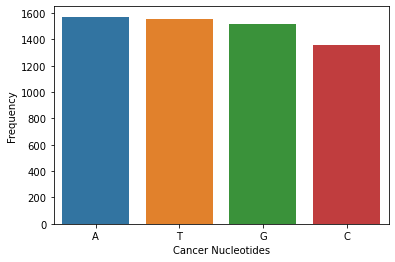

In [137]:
sns.barplot(human_gene.iloc[:,0], human_gene.iloc[:,1])
plt.show()

In [138]:
print(char_frequency(ReferenceSequence1))
nucleotide_set1 = char_frequency(ReferenceSequence1)

mutate_human = pd.DataFrame(data=nucleotide_set1, index=[0]).T.reset_index()
mutate_human = mutate_human.rename(columns={0: 'Frequency', 'index': 'Human_mutated_Nucleotides'})
mutate_human = mutate_human.sort_values(by=['Frequency'], ascending=False)

{'C': 1356, 'T': 1556, 'A': 1573, 'G': 1517}


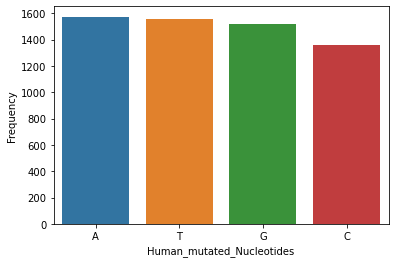

In [139]:
sns.barplot(mutate_human.iloc[:,0], mutate_human.iloc[:,1])
plt.show()

In [140]:
def GC_content(Dictionary):
    content = ((Dictionary["G"] + Dictionary["C"]) / (Dictionary["A"] + Dictionary["T"] + Dictionary["G"] + Dictionary["C"]))* 100
    return content

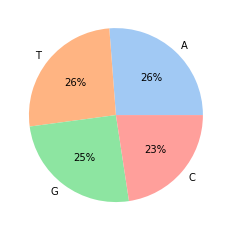

In [141]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(human_gene.iloc[:,1], labels = human_gene.iloc[:,0], colors = colors, autopct='%.0f%%')
plt.show()

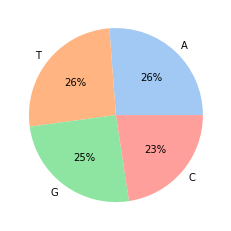

In [142]:
plt.pie(mutate_human.iloc[:,1], labels = mutate_human.iloc[:,0], colors = colors, autopct='%.0f%%')
plt.show()

In [143]:
Dictionary = {"Substitution":0, "Insertion":1, "Deletion":2}
for index,i in enumerate(mutation_index):
    mutation_index[index][1] = Dictionary[mutation_index[index][1]] 

Num_Substitutions = 0
Num_Insertions = 0
Num_Deletions = 0

for i in mutation_index:
    if(i[1]==0):
        Num_Substitutions = Num_Substitutions + 1
    if(i[1]==1):
        Num_Insertions = Num_Insertions + 1
    if(i[1]==2):
        Num_Deletions = Num_Deletions + 1

Num_FrameShift = Num_Insertions + Num_Deletions

In [144]:
Num_FrameShift

1

## Extracting only the top substitutions from all the mutations

In [145]:
filtered_substitution = []
for i in mutation_index:
    if(i[1]==0):
        filtered_substitution.append(i[0])
    else:
        break

In [146]:
mutation_reader = []
actual = Genome_Before_Mutation
mutated = Genome_After_Mutation

for i in filtered_substitution:
    
    if(i%3==0):
        if(i+3 <= len(Genome_Before_Mutation)):
            if(i+1==len(Genome_Before_Mutation)):
                mutation_reader.append(f"{actual[i]}--->{mutated[i]}")
            else:
                mutation_reader.append((f"{actual[i:i+3]}--->{mutated[i:i+3]}"))
        else:
            mutation_reader.append(f"{actual[i:]}--->{mutated[i:]}")
    
    elif(i%3==1):
        if(i+2 <= len(Genome_Before_Mutation)):
            if(i+1==len(Genome_Before_Mutation)):
                mutation_reader.append(f"{actual[i]}--->{mutated[i]}")
            else:
                mutation_reader.append((f"{actual[i-1:i+2]}--->{mutated[i-1:i+2]}"))
        else:
            mutation_reader.append(f"{actual[i-1:]}--->{mutated[i-1:]}")
    
    else:
        mutation_reader.append(f"{actual[i-2:i+1]}--->{mutated[i-2:i+1]}")

In [147]:
mutation_reader

['GGG--->GAG', 'CTG--->CTT']

## Classifying the substitution mutation as missense or non-sense or silence mutation

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
A_codon = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
}

In [150]:
C_codon = {
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
}

In [151]:
G_codon = {
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
}

In [152]:
T_codon = {
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}

In [153]:
codon_encoder = dict()
codon_encoder.update(A_codon)
codon_encoder.update(T_codon)
codon_encoder.update(G_codon)
codon_encoder.update(C_codon)

In [154]:
Extracted_codons = mutation_reader
Extracted_codons

['GGG--->GAG', 'CTG--->CTT']

In [155]:
Encoded_proteins = []
for index,i in enumerate(Extracted_codons):
    Encoded_proteins.append((codon_encoder[Extracted_codons[index][0:3]], codon_encoder[Extracted_codons[index][7:10]]))


In [156]:
for index, i in enumerate(Encoded_proteins):
    if(i[0]!=i[1]):
        if(Num_FrameShift > 0):
            print(f"Mutation at {mutation_index[index][0]} can cause cancer as it is a missense mutation.(High severity)")
        else:
            print(f"Mutation at {mutation_index[index][0]} can cause cancer as it is a missense mutation.(not much sever)")
    elif(i[1]=="_"):
        print(f"Mutation at {mutation_index[index][0]} is a nonsense mutation")
    else:
        print(f"Mutation at {mutation_index[index][0]} cannot be responsible for cancer as it is a silence mutation")

Mutation at 4000 can cause cancer as it is a missense mutation.(High severity)
Mutation at 5000 cannot be responsible for cancer as it is a silence mutation
